<h2> Car Prediction Model </h2>

In [1]:
import numpy as np;
import pandas as pd;
import seaborn as sns;
import matplotlib.pyplot as plt;

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('CarPrice_Assignment.csv');

In [3]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df.shape

(205, 26)

In [5]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [6]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [7]:
df.duplicated().sum()

0

In [8]:
df.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [9]:
df['car_ID'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [10]:
df.drop(['car_ID'], inplace=True, axis=1)

In [11]:
df.shape

(205, 25)

In [12]:
df['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [13]:
df['fueltype'].unique()

array(['gas', 'diesel'], dtype=object)

In [14]:
df['aspiration'].unique()

array(['std', 'turbo'], dtype=object)

In [15]:
df['doornumber'].unique()

array(['two', 'four'], dtype=object)

In [16]:
df['carbody'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [17]:
df['drivewheel'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [18]:
#change categorical into numerical 

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
encoder = LabelEncoder()

for col in df.columns:
    if(df[col].dtypes == 'object'):
        df[col] = encoder.fit_transform(df[col])

In [21]:
df

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,2,1,0,1,0,2,0,88.6,168.8,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,3,1,0,1,0,2,0,88.6,168.8,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,1,1,0,1,2,2,0,94.5,171.2,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,4,1,0,0,3,1,0,99.8,176.6,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,5,1,0,0,3,0,0,99.4,176.6,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,139,1,0,0,3,2,0,109.1,188.8,...,141,5,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,138,1,1,0,3,2,0,109.1,188.8,...,141,5,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,140,1,0,0,3,2,0,109.1,188.8,...,173,5,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,142,0,1,0,3,2,0,109.1,188.8,...,145,3,3.01,3.40,23.0,106,4800,26,27,22470.0


In [22]:
df.dtypes

symboling             int64
CarName               int32
fueltype              int32
aspiration            int32
doornumber            int32
carbody               int32
drivewheel            int32
enginelocation        int32
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype            int32
cylindernumber        int32
enginesize            int64
fuelsystem            int32
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [23]:
#remove outliers


def remove_outliers(df,col):
    q1 = df[col].quantile(0.25);
    q3 = df[col].quantile(0.75);
    iqr = q3 - q1;
    
    max_ = q3 + (1.5*iqr);
    min_ = q1 - (1.5*iqr);
    
    df.loc[df[col] < min_,col] = min_;
    df.loc[df[col] > max_,col] = max_;

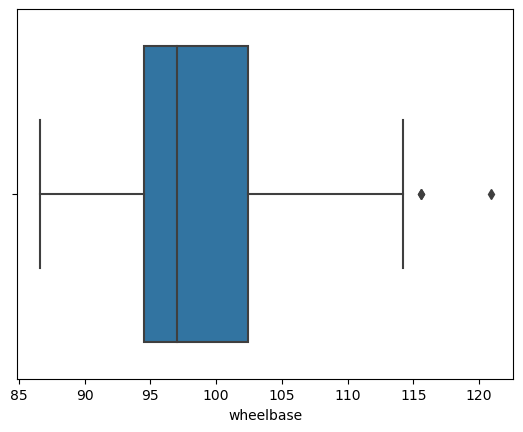

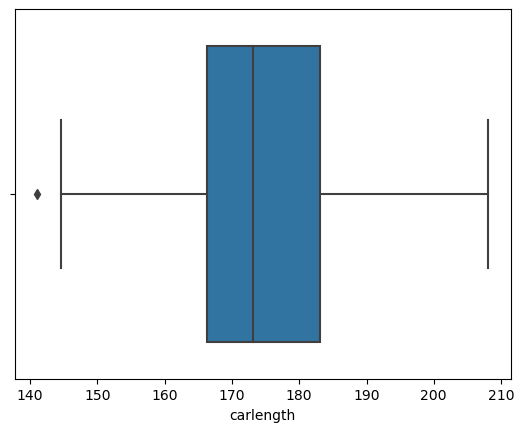

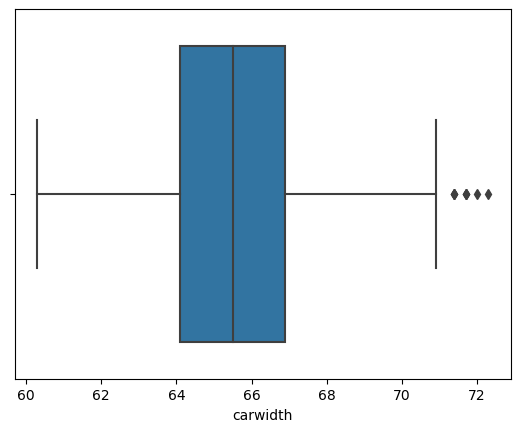

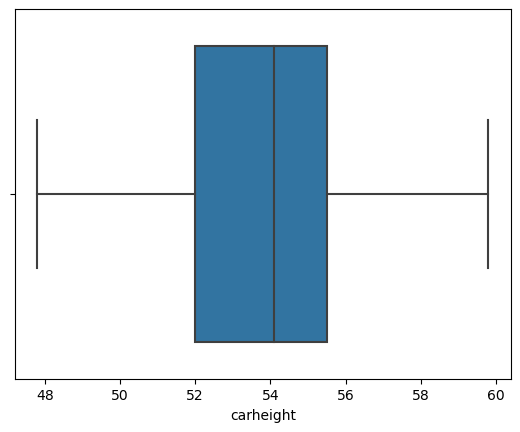

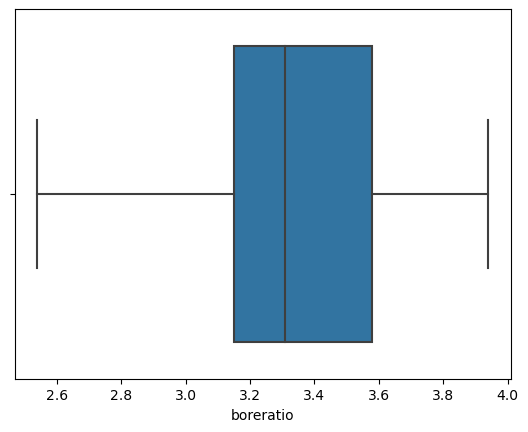

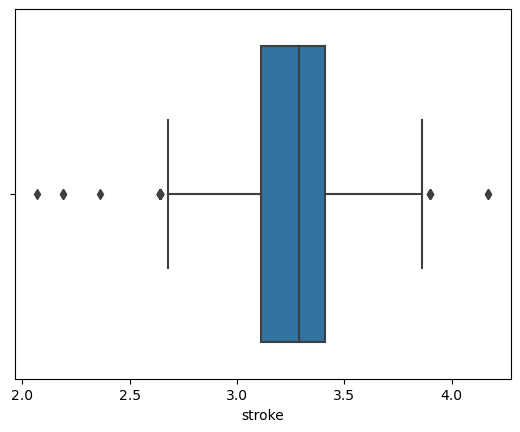

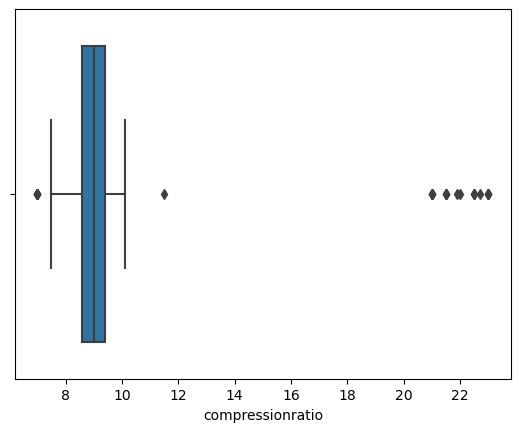

In [24]:
for col in df.columns:
    if (col != 'price' and df[col].dtypes == 'float64'):
        plt.figure()
        sns.boxplot(df[col])

In [25]:
for col in df.columns:
    if (col != 'price' and df[col].dtypes == 'float64'):
        remove_outliers(df,col)

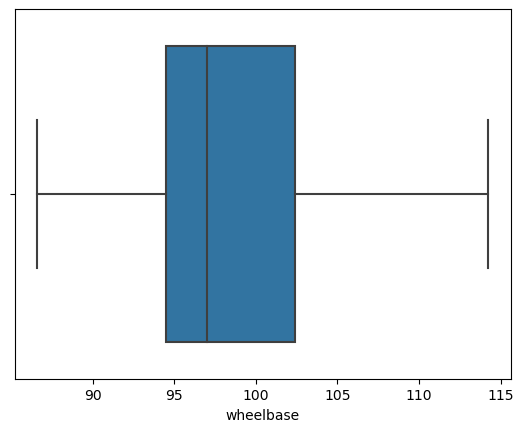

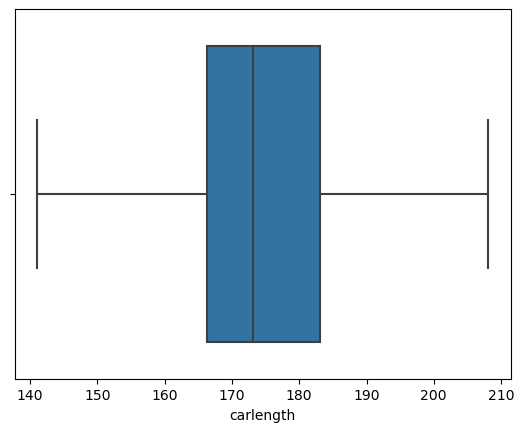

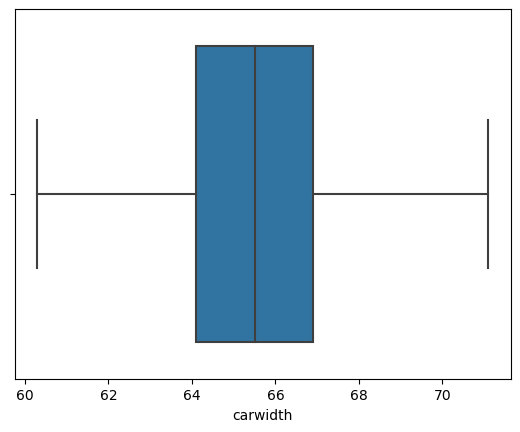

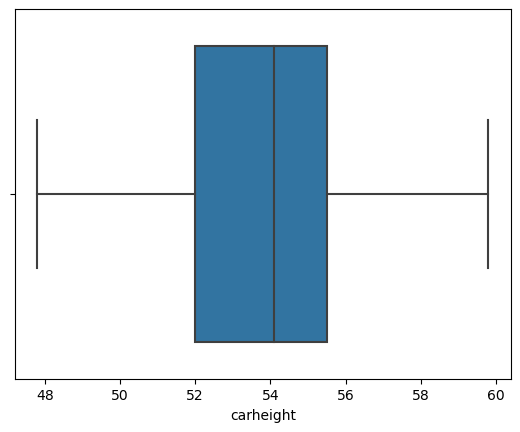

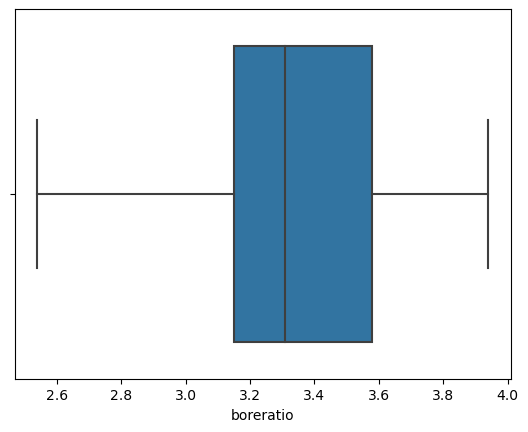

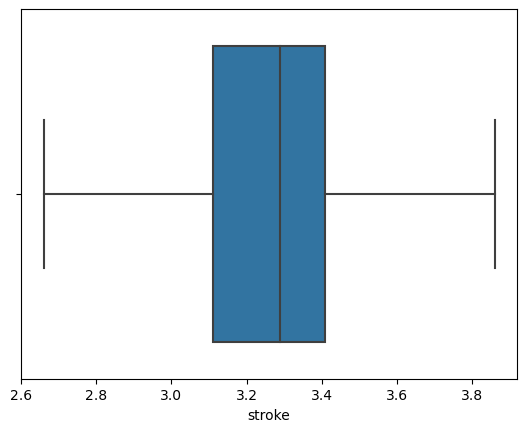

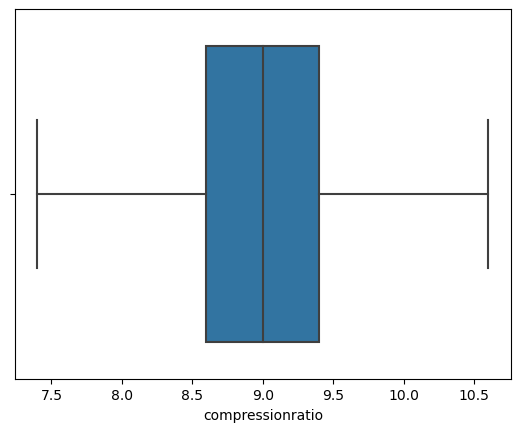

In [26]:
for col in df.columns:
    if (col != 'price' and df[col].dtypes == 'float64'):
        plt.figure()
        sns.boxplot(df[col])

In [27]:
from sklearn.preprocessing import MinMaxScaler;

In [28]:
scaler = MinMaxScaler()
df_new = df.copy()

In [29]:
for col in df.columns:
    if (col != 'price'):
        df_new[col] = scaler.fit_transform(df_new[col].values.reshape(-1,1))

In [30]:
df_new

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1.0,0.013699,1.0,0.0,1.0,0.00,1.0,0.0,0.072333,0.413433,...,0.260377,0.714286,0.664286,0.016667,0.50000,0.262500,0.346939,0.222222,0.289474,13495.0
1,1.0,0.020548,1.0,0.0,1.0,0.00,1.0,0.0,0.072333,0.413433,...,0.260377,0.714286,0.664286,0.016667,0.50000,0.262500,0.346939,0.222222,0.289474,16500.0
2,0.6,0.006849,1.0,0.0,1.0,0.50,1.0,0.0,0.285714,0.449254,...,0.343396,0.714286,0.100000,0.675000,0.50000,0.441667,0.346939,0.166667,0.263158,16500.0
3,0.8,0.027397,1.0,0.0,0.0,0.75,0.5,0.0,0.477396,0.529851,...,0.181132,0.714286,0.464286,0.616667,0.81250,0.225000,0.551020,0.305556,0.368421,13950.0
4,0.8,0.034247,1.0,0.0,0.0,0.75,0.0,0.0,0.462929,0.529851,...,0.283019,0.714286,0.464286,0.616667,0.18750,0.279167,0.551020,0.138889,0.157895,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.2,0.952055,1.0,0.0,0.0,0.75,1.0,0.0,0.813743,0.711940,...,0.301887,0.714286,0.885714,0.408333,0.65625,0.275000,0.510204,0.277778,0.315789,16845.0
201,0.2,0.945205,1.0,1.0,0.0,0.75,1.0,0.0,0.813743,0.711940,...,0.301887,0.714286,0.885714,0.408333,0.40625,0.466667,0.469388,0.166667,0.236842,19045.0
202,0.2,0.958904,1.0,0.0,0.0,0.75,1.0,0.0,0.813743,0.711940,...,0.422642,0.714286,0.742857,0.175000,0.43750,0.358333,0.551020,0.138889,0.184211,21485.0
203,0.2,0.972603,0.0,1.0,0.0,0.75,1.0,0.0,0.813743,0.711940,...,0.316981,0.428571,0.335714,0.616667,1.00000,0.241667,0.265306,0.361111,0.289474,22470.0


<AxesSubplot:>

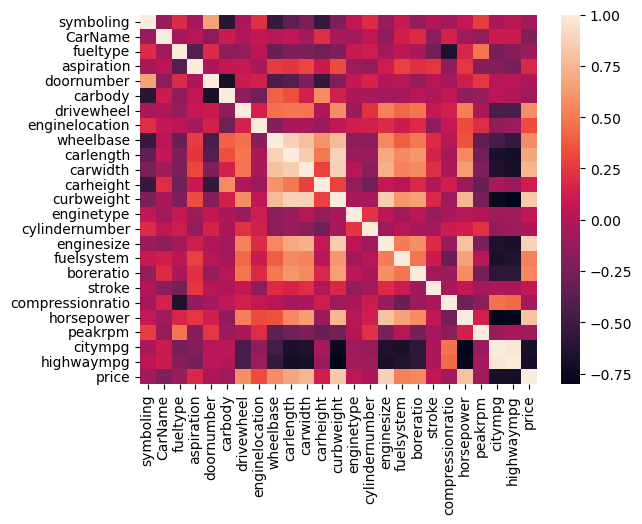

In [31]:
sns.heatmap(df_new.corr())

In [32]:
corr = df_new.corr()
corr_mask = corr.mask(np.triu(np.ones_like(corr, dtype=np.bool)))
corr_unstacked = corr_mask.unstack().sort_values(ascending = False);
corr_df = pd.DataFrame(corr_unstacked[corr_unstacked>.75]).sort_index()

In [33]:
corr_df

0
carlength  carwidth    0.847860
           curbweight  0.877728
carwidth   curbweight  0.871963
           price       0.753383
citympg    highwaympg  0.971337
curbweight enginesize  0.850594
           horsepower  0.750739
           price       0.835305
enginesize horsepower  0.809769
           price       0.874145
horsepower price       0.808139
wheelbase  carlength   0.874780
           carwidth    0.798179
           curbweight  0.775265

In [34]:
df_new.drop(['carwidth','highwaympg','curbweight','horsepower','wheelbase','enginesize'], axis =1,inplace = True)

,,0


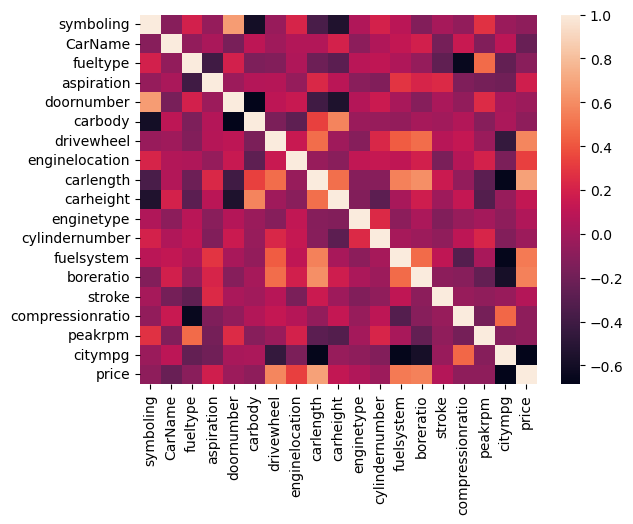

In [36]:
sns.heatmap(df_new.corr())

corr = df_new.corr()
corr_mask = corr.mask(np.triu(np.ones_like(corr, dtype=np.bool)))
corr_unstacked = corr_mask.unstack().sort_values(ascending = False);
corr_df = pd.DataFrame(corr_unstacked[corr_unstacked>.75]).sort_index()
corr_df

<h1> MODELLING </h1>

In [44]:
X = df_new.drop(['price'],axis=1)
y = df_new['price']

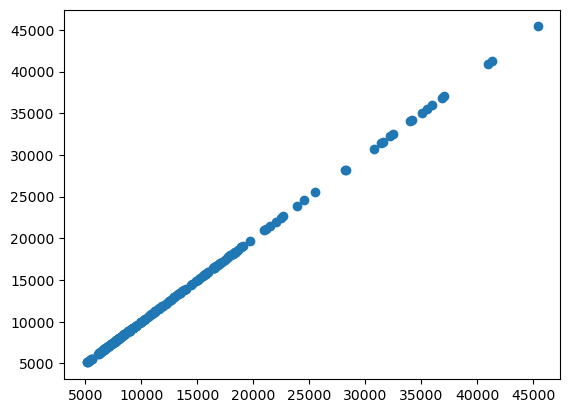

In [45]:
plt.scatter(y,y)

In [47]:
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42, train_size=.80);

In [63]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [64]:
def evaluate_model(model):
    y_pred = model.predict(X_test);
    print('r^2 Score: ', r2_score(y_test, y_pred)) # accuracy score
    print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred)); #closer to zero, better
    print('Root Mean Square Eror: ', np.sqrt(mean_squared_error(y_test, y_pred)))  #closer to zero, better
    
    plt.scatter(y_train, model.predict(X_train), color='g')
    plt.plot(y_pred, y_pred)
    plt.show()

r^2 Score:  0.6558308629096208
Mean Absolute Error:  3500.219660422098
Root Mean Square Eror:  5212.494176936475


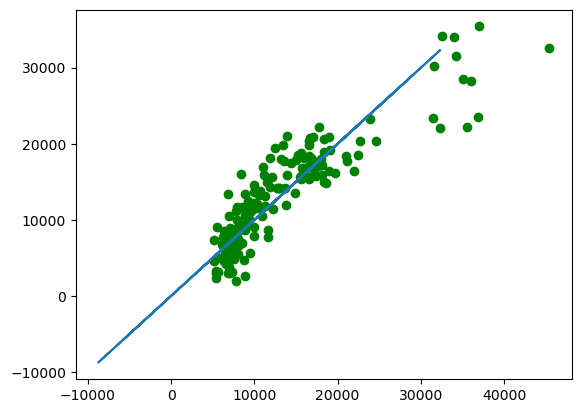

In [65]:
from sklearn.linear_model import LinearRegression

r = LinearRegression();
r.fit(X_train, y_train)
evaluate_model(r)

In [66]:
from sklearn.ensemble import GradientBoostingRegressor;

r^2 Score:  0.9217978766832111
Mean Absolute Error:  1629.4155851021453
Root Mean Square Eror:  2484.6710156385193


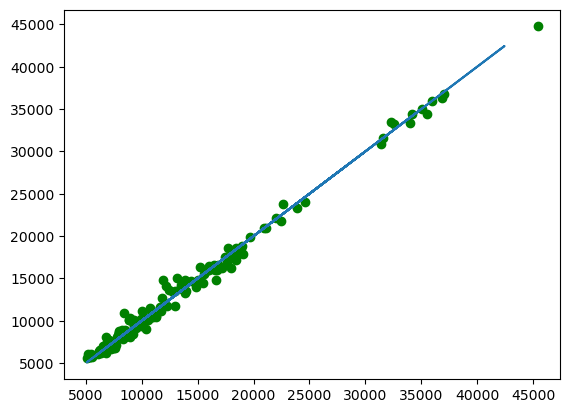

In [67]:
gbr = GradientBoostingRegressor();
gbr.fit(X_train,y_train)
evaluate_model(gbr)


In [68]:
from sklearn.linear_model import ElasticNet

r^2 Score:  0.24633282671847445
Mean Absolute Error:  5336.6545083170795
Root Mean Square Eror:  7713.463363745843


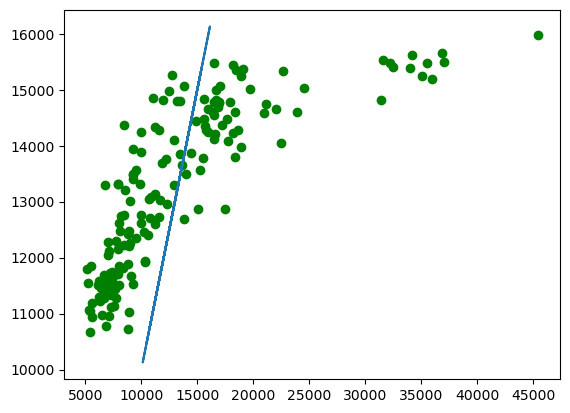

In [72]:
en = ElasticNet();
en.fit(X_train,y_train)
evaluate_model(en)


In [75]:
from sklearn.linear_model import SGDRegressor

r^2 Score:  0.7118892167986437
Mean Absolute Error:  3285.076253902239
Root Mean Square Eror:  4769.132382803228


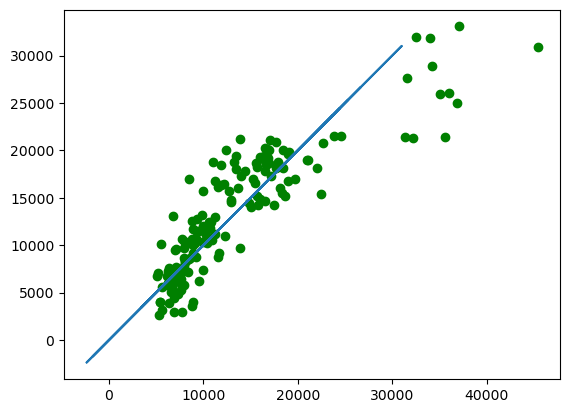

In [76]:
sdg = SGDRegressor()
sdg.fit(X_train,y_train)
evaluate_model(sdg)

In [ ]:
models = ['GradientBoostingRegressor',]

In [77]:
from sklearn.linear_model import BayesianRidge

r^2 Score:  0.6845796363986058
Mean Absolute Error:  3351.576760466562
Root Mean Square Eror:  4990.0452673315185


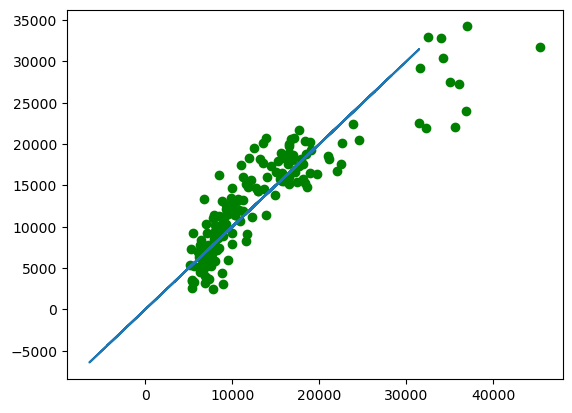

In [78]:
br = BayesianRidge()
br.fit(X_train,y_train)
evaluate_model(br)

KernelRidge()
r^2 Score:  0.6997966928259374
Mean Absolute Error:  3423.85100770342
Root Mean Square Eror:  4868.188179363189


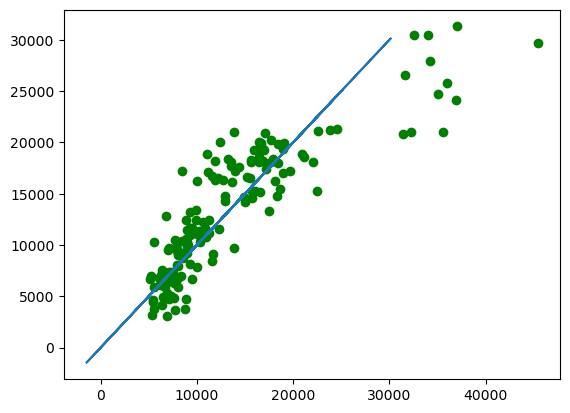

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)
r^2 Score:  0.9339540510387776
Mean Absolute Error:  1569.7944572217987
Root Mean Square Eror:  2283.4037693346186


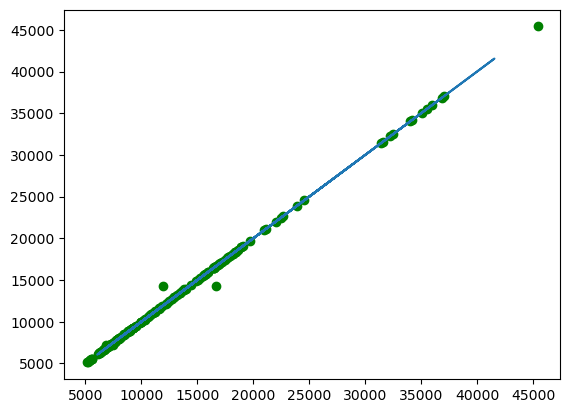

LGBMRegressor()
r^2 Score:  0.9253334939228222
Mean Absolute Error:  1792.7147550686718
Root Mean Square Eror:  2427.853828954251


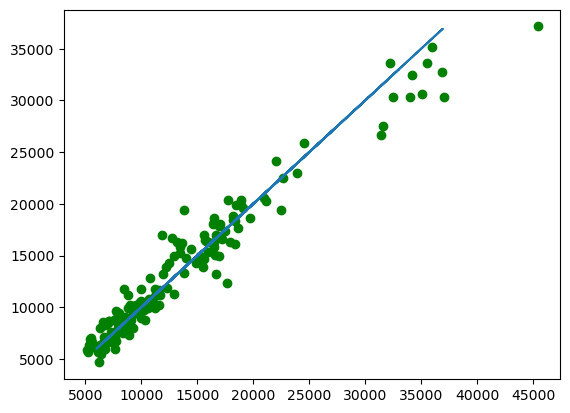

RandomForestRegressor()
r^2 Score:  0.9199074477185619
Mean Absolute Error:  1641.1003577235772
Root Mean Square Eror:  2514.5234378726554


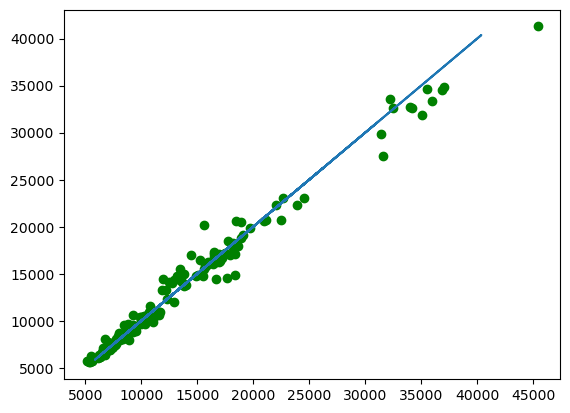

In [88]:
from sklearn.kernel_ridge import KernelRidge;
from xgboost import XGBRegressor;
from lightgbm import LGBMRegressor;
from sklearn.ensemble import RandomForestRegressor


models = [KernelRidge(),XGBRegressor(),LGBMRegressor(), RandomForestRegressor()]
for model in models:
    print(model)
    model.fit(X_train, y_train)
    evaluate_model(model)



r^2 Score:  0.9339540510387776
Mean Absolute Error:  1569.7944572217987
Root Mean Square Eror:  2283.4037693346186


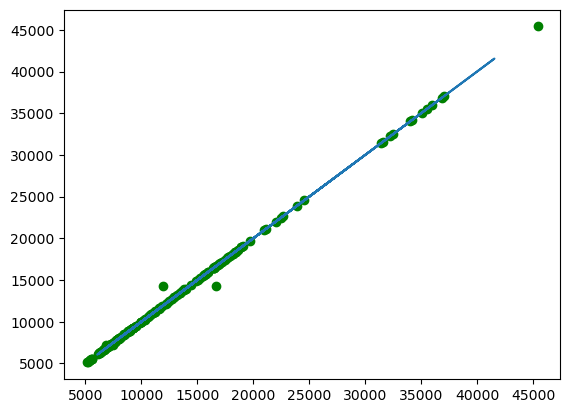

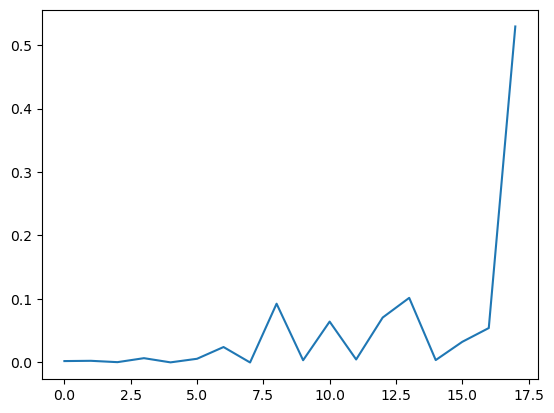

In [90]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
evaluate_model(xgb)

plt.plot(xgb.feature_importances_)

In [91]:
X.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'carlength', 'carheight',
       'enginetype', 'cylindernumber', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'peakrpm', 'citympg'],
      dtype='object')

In [92]:
X.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,carlength,carheight,enginetype,cylindernumber,fuelsystem,boreratio,stroke,compressionratio,peakrpm,citympg
0,1.0,0.013699,1.0,0.0,1.0,0.00,1.0,0.0,0.413433,0.083333,0.000000,0.333333,0.714286,0.664286,0.016667,0.5000,0.346939,0.222222
1,1.0,0.020548,1.0,0.0,1.0,0.00,1.0,0.0,0.413433,0.083333,0.000000,0.333333,0.714286,0.664286,0.016667,0.5000,0.346939,0.222222
2,0.6,0.006849,1.0,0.0,1.0,0.50,1.0,0.0,0.449254,0.383333,0.833333,0.500000,0.714286,0.100000,0.675000,0.5000,0.346939,0.166667
3,0.8,0.027397,1.0,0.0,0.0,0.75,0.5,0.0,0.529851,0.541667,0.500000,0.333333,0.714286,0.464286,0.616667,0.8125,0.551020,0.305556
4,0.8,0.034247,1.0,0.0,0.0,0.75,0.0,0.0,0.529851,0.541667,0.500000,0.166667,0.714286,0.464286,0.616667,0.1875,0.551020,0.138889


r^2 Score:  0.9163613657791854
Mean Absolute Error:  1670.7190162601626
Root Mean Square Eror:  2569.585586485502


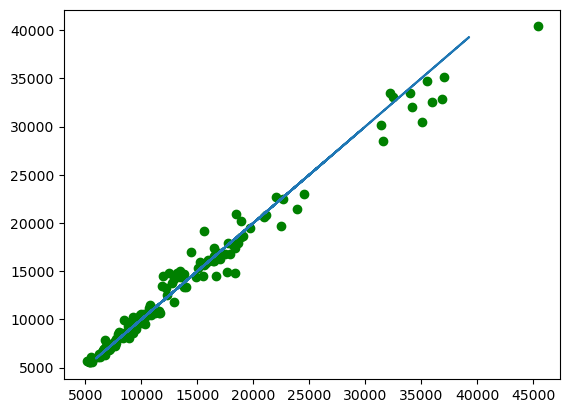

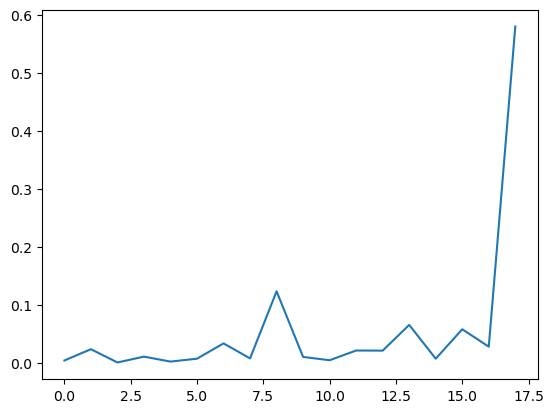

In [93]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
evaluate_model(rf)

plt.plot(rf.feature_importances_)

In [96]:
X.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'carlength', 'carheight',
       'enginetype', 'cylindernumber', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'peakrpm', 'citympg'],
      dtype='object')